In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')

X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values

#Success
dataset.head(n=5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Salary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101349,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112543,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113932,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93827,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084,0


In [17]:
exited = dataset[(dataset['Exited']==1)]
remained = dataset[(dataset['Exited']==0)]

print "Statistics for the customers dataset:\n"
print "Average Salary of customers who exited: ${:,.0f}".format(exited['Salary'].mean())
print "Average Salary of customers who remained: ${:,.0f}".format(remained['Salary'].mean())
print "\nAverage Balance of customers who exited: ${:,.0f}".format(exited['Balance'].mean())
print "Average Balance of customers who remained: ${:,.0f}".format(remained['Balance'].mean())
print "\nAverage Age of customers who exited: {:,.0f}".format(exited['Age'].mean())
print "Average Age of customers who remained: {:,.0f}".format(remained['Age'].mean())
print "\nAverage Credit Score of customers who exited: {:,.0f}".format(exited['CreditScore'].mean())
print "Average Credit Score of customers who remained: {:,.0f}".format(remained['CreditScore'].mean())
print "\nAverage Tenure of customers who exited: {:,.0f}".format(exited['Tenure'].mean())
print "Average Tenure of customers who remained: {:,.0f}".format(remained['Tenure'].mean())
print "\nAverage #of products of customers who exited: {:,.0f}".format(exited['NumOfProducts'].mean())
print "Average #of products of customers who remained: {:,.0f}".format(remained['NumOfProducts'].mean())
print "\n#of customers who exited and had a credit card: {}".format(len(exited[exited['HasCrCard'] == 1]))
print "#of customers who exited and didn't have a credit card: {}".format(len(exited[exited['HasCrCard'] == 0]))
print "\n#of customers who remained and had a credit card: {}".format(len(remained[remained['HasCrCard'] == 1]))
print "#of customers who remained and didn't have a credit card: {}".format(len(remained[remained['HasCrCard'] == 0]))
print "\n%of exited customers who were active in the past 6 months: {:.2f}".format(float(len(exited[exited['IsActiveMember'] == 1]))*100/(len(exited)))
print "%of exited customers who were not active in the past 6 months: {:.2f}".format(float(len(exited[exited['IsActiveMember'] == 0]))*100/(len(exited)))
print "\n%of remained customers who were active in the past 6 months: {:.2f}".format(float(len(remained[remained['IsActiveMember'] == 1]))*100/(len(remained)))
print "%of remained customers who were not active in the past 6 months: {:.2f}".format(float(len(remained[remained['IsActiveMember'] == 0]))*100/(len(remained)))
print "\n%of 0 balance accounts in the exited customers category: {:.2f}".format(float(len(exited[(exited['Balance']<0.000001)])*100/len(exited)))
print "%of 0 balance accounts in the remaining customers category: {:.2f}".format(float(len(remained[(remained['Balance']<0.000001)])*100/len(remained)))

Statistics for the customers dataset:

Average Salary of customers who exited: $101,466
Average Salary of customers who remained: $99,738

Average Balance of customers who exited: $91,109
Average Balance of customers who remained: $72,745

Average Age of customers who exited: 45
Average Age of customers who remained: 37

Average Credit Score of customers who exited: 645
Average Credit Score of customers who remained: 652

Average Tenure of customers who exited: 5
Average Tenure of customers who remained: 5

Average #of products of customers who exited: 1
Average #of products of customers who remained: 2

#of customers who exited and had a credit card: 1424
#of customers who exited and didn't have a credit card: 613

#of customers who remained and had a credit card: 5631
#of customers who remained and didn't have a credit card: 2332

%of exited customers who were active in the past 6 months: 36.08
%of exited customers who were not active in the past 6 months: 63.92

%of remained custome

**The following plots show a breakdown of various factors by geography. Viewing data at the geographical level will give us region specific insight **

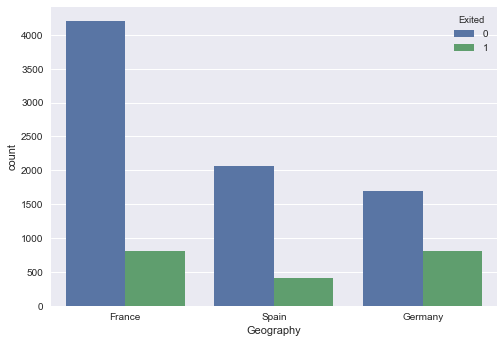

In [2]:
sns.countplot(x='Geography',hue='Exited',data=dataset)

The plot above shows that Germany has the highest customer churn(~50%) followed by Spain(~25%) with France(~17%) being last (in % terms)

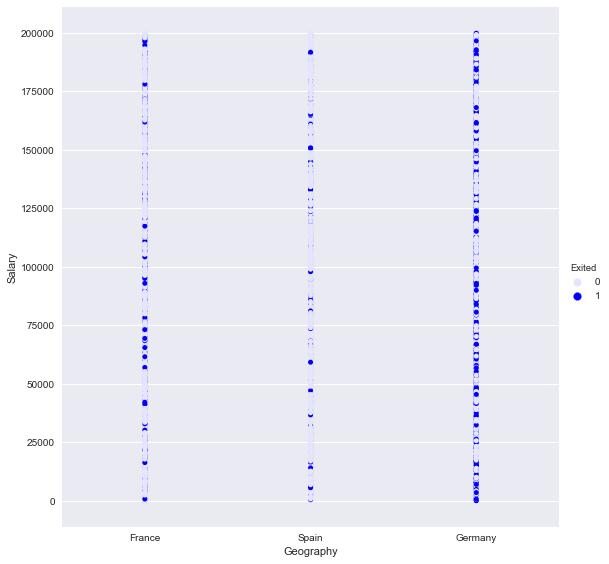

In [3]:
sns.factorplot(x="Geography", y="Salary", hue="Exited",data=dataset, kind="strip",size=8,color='blue')

From the previous section we can see that the average salary is around 100K for customers who exited and remained. Again, we see that Germany has the highest churn and also there is a significant proportion who have higher than average salary. For France, we see that churn is higher in the lower than average salary range.

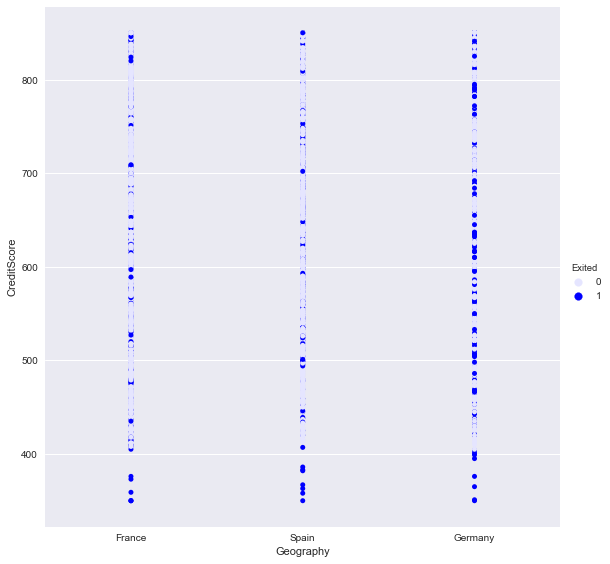

In [4]:
sns.factorplot(x="Geography", y="CreditScore", hue="Exited",data=dataset, kind="strip",size=8,color='blue')

The plot above shows that there is higher churn among customers who have lower than average credit score.

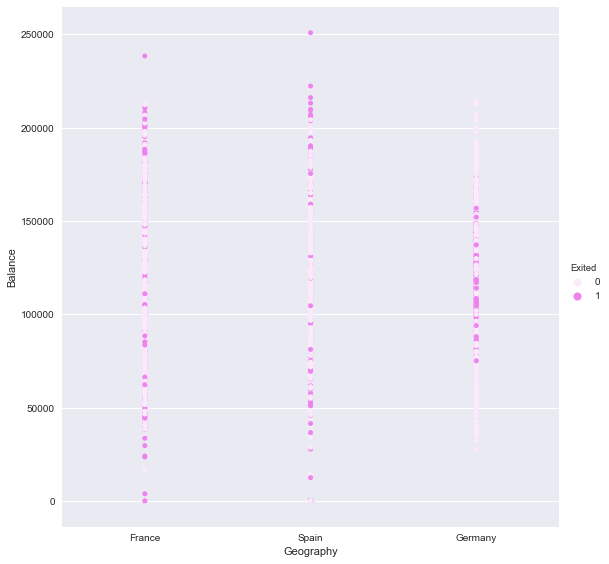

In [8]:
sns.factorplot(x="Geography", y="Balance", hue="Exited",data=dataset, kind="strip",size=8,color='violet')

The plot above shows that customers who exit the company have higher than average balances. Therefore, the company is losing pretty lucrative customers.

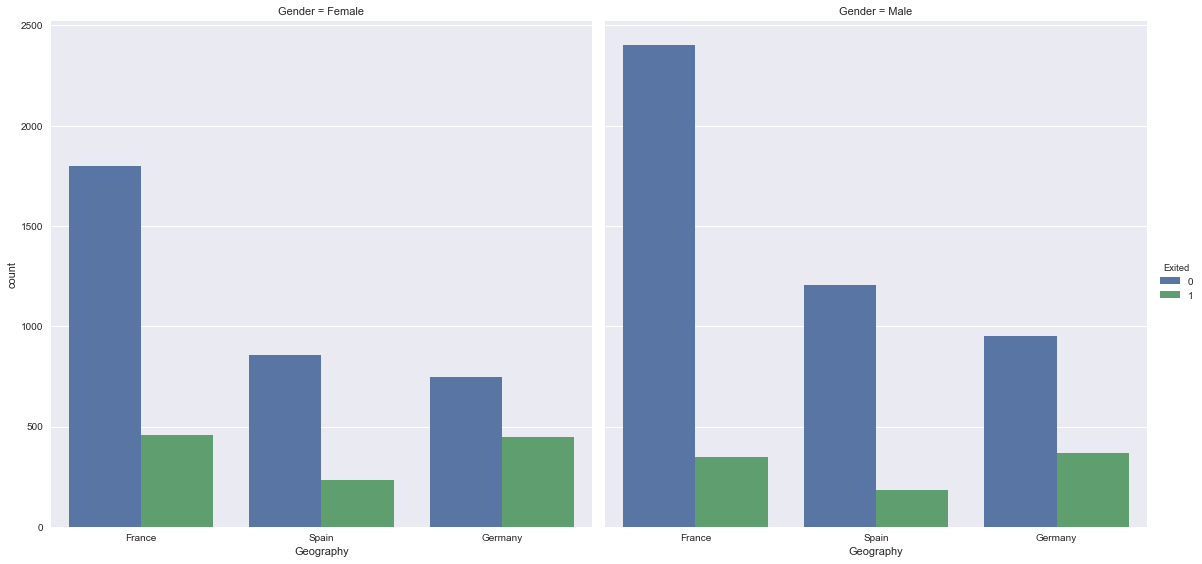

In [9]:
sns.factorplot(x="Geography", hue="Exited", col="Gender",data=dataset, kind="count",size=8)

The company has higher male customers vs female customers in every region. In Germany, it appears that there is higher churn among the female customer base. In Spain and France, customer churn is lower among the male customer base though.

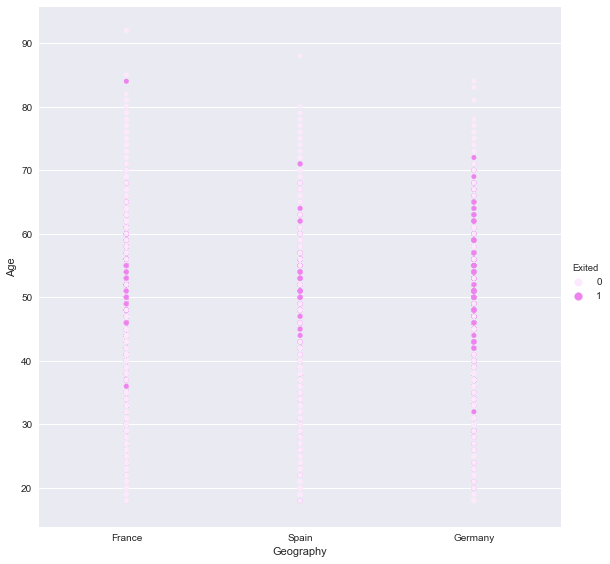

In [10]:
sns.factorplot(x="Geography", y="Age", hue="Exited",data=dataset, kind="strip",size=8,color='violet')

The plot above clearly shows that customer churn is higher among customers who are higher than the average age. Older customers are exiting the bank even more than younger customers. This presents a nice opportunity to target older customers in all 3 regions.

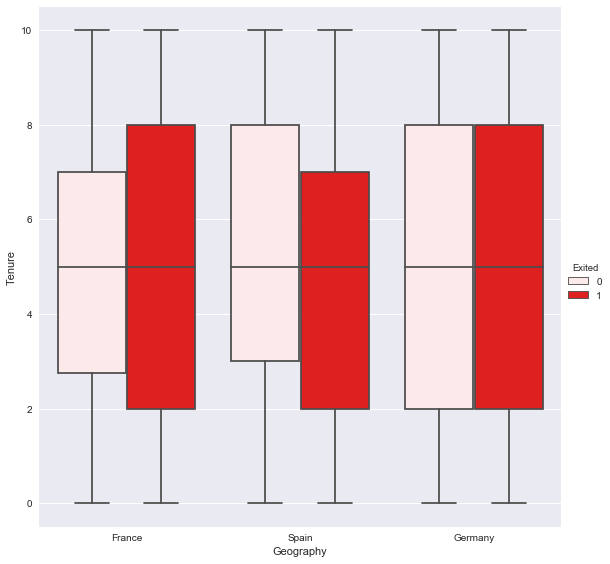

In [11]:
sns.factorplot(x="Geography", y="Tenure", hue="Exited",data=dataset, kind="box",size=8,color='red')

The boxplot doesn't show any tenure difference between customers who exited and those who did not.

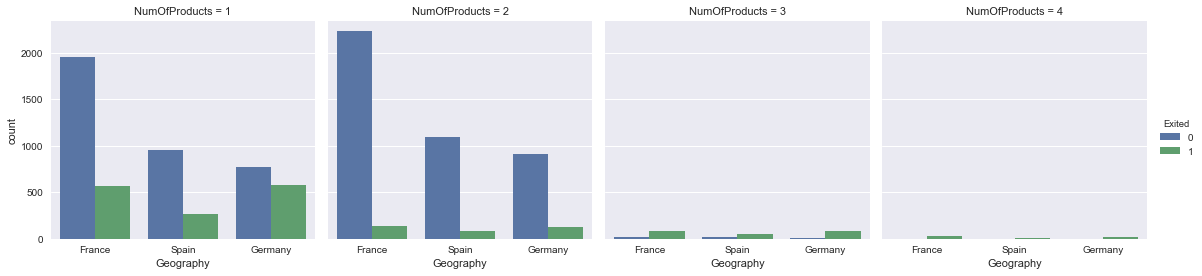

In [12]:
sns.factorplot(x="Geography", hue="Exited", col="NumOfProducts",data=dataset, kind="count")

There appears to be no relation between number of products and customer exit. From 1 to 2 the exit seems to be decreasing but customers who have 3 and 4 products are exiting at a higher rate.

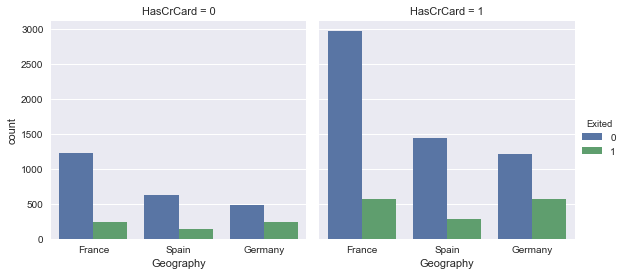

In [13]:
sns.factorplot(x="Geography", hue="Exited", col="HasCrCard",data=dataset, kind="count")

The plot above seems to suggest that customer who have a credit card exit the company more than those who don't have a credit card

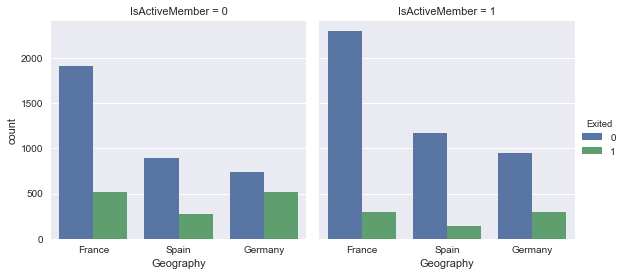

In [14]:
sns.factorplot(x="Geography", hue="Exited", col="IsActiveMember",data=dataset, kind="count")

In all 3 regions customers who are inactive are leaving the company more than customers who are active.

In [18]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:] #To avoid the dummy variable trap

In [19]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#Success

print "Splitting the dataset into training and testing sets is successful"

Splitting the dataset into training and testing sets is successful


In [20]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
# Evaluate Logistic Regression model

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

y_pred = (y_pred > 0.5)
from sklearn.metrics import accuracy_score,fbeta_score
accuracy=accuracy_score(y_test, y_pred)
fscore=fbeta_score(y_test, y_pred, average='binary', beta=0.5)


In [15]:
accuracy

0.81100000000000005

In [16]:
fscore

0.45070422535211269

In [2]:
# Building an ANN to see if we can improve on the Logistic Regression model and Naive Predictor

import keras
from keras.models import Sequential
from keras.layers import Dense


# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))


# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))


# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Using TensorFlow backend.


Epoch 1/100
8000/8000 [==============================] - 2s - loss: 0.4865 - acc: 0.7955     
Epoch 2/100
8000/8000 [==============================] - 2s - loss: 0.4283 - acc: 0.7960     
Epoch 3/100
8000/8000 [==============================] - 2s - loss: 0.4230 - acc: 0.7960     
Epoch 4/100
8000/8000 [==============================] - 2s - loss: 0.4191 - acc: 0.8179     
Epoch 5/100
8000/8000 [==============================] - 2s - loss: 0.4167 - acc: 0.8247     
Epoch 6/100
8000/8000 [==============================] - 2s - loss: 0.4149 - acc: 0.8300     
Epoch 7/100
8000/8000 [==============================] - 2s - loss: 0.4135 - acc: 0.8310     
Epoch 8/100
8000/8000 [==============================] - 2s - loss: 0.4121 - acc: 0.8314     
Epoch 9/100
8000/8000 [==============================] - 2s - loss: 0.4114 - acc: 0.8325     
Epoch 10/100
8000/8000 [==============================] - 2s - loss: 0.4105 - acc: 0.8341     
Epoch 11/100
8000/8000 [==============================] - 2

In [3]:
# Test model performance
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
from sklearn.metrics import accuracy_score,fbeta_score
accuracy=accuracy_score(y_test, y_pred)
fscore=fbeta_score(y_test, y_pred, average='binary', beta=0.5)

In [5]:
accuracy


0.84350000000000003

In [6]:
fscore

0.60722521137586472

In [2]:
# Assessing Bias-Variance Trade off using K-Fold Cross Validation

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, batch_size = 10, epochs = 100)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
mean = accuracies.mean()
variance = accuracies.std()

Using TensorFlow backend.


Epoch 1/100
7200/7200 [==============================] - 2s - loss: 0.4844 - acc: 0.7971     
Epoch 2/100
7200/7200 [==============================] - 2s - loss: 0.4286 - acc: 0.7971     
Epoch 3/100
7200/7200 [==============================] - 1s - loss: 0.4235 - acc: 0.7971     
Epoch 4/100
7200/7200 [==============================] - 1s - loss: 0.4197 - acc: 0.8121     
Epoch 5/100
7200/7200 [==============================] - 2s - loss: 0.4167 - acc: 0.8231     
Epoch 6/100
7200/7200 [==============================] - 1s - loss: 0.4151 - acc: 0.8286     
Epoch 7/100
7200/7200 [==============================] - 2s - loss: 0.4139 - acc: 0.8287     
Epoch 8/100
7200/7200 [==============================] - 1s - loss: 0.4126 - acc: 0.8304     
Epoch 9/100
7200/7200 [==============================] - 1s - loss: 0.4115 - acc: 0.8294     
Epoch 10/100
7200/7200 [==============================] - 2s - loss: 0.4103 - acc: 0.8318     
Epoch 11/100
7200/7200 [==============================] - 2

7200/7200 [==============================] - 2s - loss: 0.4003 - acc: 0.8347     
Epoch 73/100
7200/7200 [==============================] - 1s - loss: 0.4003 - acc: 0.8353     
Epoch 74/100
7200/7200 [==============================] - 1s - loss: 0.3999 - acc: 0.8349     
Epoch 75/100
7200/7200 [==============================] - 1s - loss: 0.3999 - acc: 0.8362     
Epoch 76/100
7200/7200 [==============================] - 2s - loss: 0.4003 - acc: 0.8364     
Epoch 77/100
7200/7200 [==============================] - 2s - loss: 0.3996 - acc: 0.8347     
Epoch 78/100
7200/7200 [==============================] - 1s - loss: 0.4000 - acc: 0.8351     
Epoch 79/100
7200/7200 [==============================] - 2s - loss: 0.3999 - acc: 0.8351     
Epoch 80/100
7200/7200 [==============================] - 2s - loss: 0.3998 - acc: 0.8365     
Epoch 81/100
7200/7200 [==============================] - 2s - loss: 0.3998 - acc: 0.8371     
Epoch 82/100
7200/7200 [==============================] - 2s - 

7200/7200 [==============================] - 1s - loss: 0.3985 - acc: 0.8368     
Epoch 43/100
7200/7200 [==============================] - 1s - loss: 0.3977 - acc: 0.8371     
Epoch 44/100
7200/7200 [==============================] - 1s - loss: 0.3982 - acc: 0.8369     
Epoch 45/100
7200/7200 [==============================] - 1s - loss: 0.3981 - acc: 0.8361     
Epoch 46/100
7200/7200 [==============================] - 1s - loss: 0.3986 - acc: 0.8361     
Epoch 47/100
7200/7200 [==============================] - 2s - loss: 0.3984 - acc: 0.8356     
Epoch 48/100
7200/7200 [==============================] - 2s - loss: 0.3974 - acc: 0.8389     
Epoch 49/100
7200/7200 [==============================] - 1s - loss: 0.3978 - acc: 0.8353     
Epoch 50/100
7200/7200 [==============================] - 1s - loss: 0.3976 - acc: 0.8368     
Epoch 51/100
7200/7200 [==============================] - 1s - loss: 0.3978 - acc: 0.8368     
Epoch 52/100
7200/7200 [==============================] - 1s - 

7200/7200 [==============================] - 1s - loss: 0.4086 - acc: 0.8333     
Epoch 13/100
7200/7200 [==============================] - 1s - loss: 0.4081 - acc: 0.8333     
Epoch 14/100
7200/7200 [==============================] - 1s - loss: 0.4077 - acc: 0.8347     
Epoch 15/100
7200/7200 [==============================] - 2s - loss: 0.4070 - acc: 0.8343     
Epoch 16/100
7200/7200 [==============================] - 2s - loss: 0.4067 - acc: 0.8362     
Epoch 17/100
7200/7200 [==============================] - 2s - loss: 0.4063 - acc: 0.8333     
Epoch 18/100
7200/7200 [==============================] - 2s - loss: 0.4048 - acc: 0.8351     
Epoch 19/100
7200/7200 [==============================] - 2s - loss: 0.4047 - acc: 0.8356     
Epoch 20/100
7200/7200 [==============================] - 2s - loss: 0.4046 - acc: 0.8347     
Epoch 21/100
7200/7200 [==============================] - 2s - loss: 0.4043 - acc: 0.8351     
Epoch 22/100
7200/7200 [==============================] - 2s - 

7200/7200 [==============================] - 2s - loss: 0.4015 - acc: 0.8351     
Epoch 84/100
7200/7200 [==============================] - 2s - loss: 0.4018 - acc: 0.8346     
Epoch 85/100
7200/7200 [==============================] - 2s - loss: 0.4014 - acc: 0.8358     
Epoch 86/100
7200/7200 [==============================] - 2s - loss: 0.4012 - acc: 0.8342     
Epoch 87/100
7200/7200 [==============================] - 2s - loss: 0.4015 - acc: 0.8365     
Epoch 88/100
7200/7200 [==============================] - 2s - loss: 0.4014 - acc: 0.8365     
Epoch 89/100
7200/7200 [==============================] - 1s - loss: 0.4014 - acc: 0.8339     
Epoch 90/100
7200/7200 [==============================] - 2s - loss: 0.4018 - acc: 0.8336     
Epoch 91/100
7200/7200 [==============================] - 2s - loss: 0.4018 - acc: 0.8351     
Epoch 92/100
7200/7200 [==============================] - 2s - loss: 0.4016 - acc: 0.8346     
Epoch 93/100
7200/7200 [==============================] - 2s - 

7200/7200 [==============================] - 2s - loss: 0.3920 - acc: 0.8379     
Epoch 54/100
7200/7200 [==============================] - 2s - loss: 0.3919 - acc: 0.8383     
Epoch 55/100
7200/7200 [==============================] - 2s - loss: 0.3918 - acc: 0.8386     
Epoch 56/100
7200/7200 [==============================] - 1s - loss: 0.3915 - acc: 0.8387     
Epoch 57/100
7200/7200 [==============================] - 2s - loss: 0.3910 - acc: 0.8387     
Epoch 58/100
7200/7200 [==============================] - 1s - loss: 0.3913 - acc: 0.8390     
Epoch 59/100
7200/7200 [==============================] - 1s - loss: 0.3912 - acc: 0.8403     
Epoch 60/100
7200/7200 [==============================] - 1s - loss: 0.3915 - acc: 0.8386     
Epoch 61/100
7200/7200 [==============================] - 2s - loss: 0.3912 - acc: 0.8389     
Epoch 62/100
7200/7200 [==============================] - 2s - loss: 0.3910 - acc: 0.8385     
Epoch 63/100
7200/7200 [==============================] - 2s - 

In [5]:
mean*100

83.799999460577951

In [6]:
variance*100

1.5157505382084413

In [2]:
# Tuning the hyperparameters and finding the best classifier using Grid Search and Cross validation
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier)
#parameters = {'batch_size': [25, 32],
              #'epochs': [100, 500],
              #'optimizer': ['adam', 'rmsprop']}

parameters = {'batch_size': [25, 64],
              'epochs': [100],
              'optimizer': ['adam', 'rmsprop']}

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_
best_classifier = grid_search.best_estimator_

Using TensorFlow backend.


Epoch 1/100
7200/7200 [==============================] - 1s - loss: 0.5520 - acc: 0.7961     
Epoch 2/100
7200/7200 [==============================] - 0s - loss: 0.4335 - acc: 0.7971     
Epoch 3/100
7200/7200 [==============================] - 0s - loss: 0.4270 - acc: 0.7971     
Epoch 4/100
7200/7200 [==============================] - 0s - loss: 0.4229 - acc: 0.7971     
Epoch 5/100
7200/7200 [==============================] - 0s - loss: 0.4190 - acc: 0.8201     
Epoch 6/100
7200/7200 [==============================] - 0s - loss: 0.4151 - acc: 0.8279     
Epoch 7/100
7200/7200 [==============================] - 0s - loss: 0.4124 - acc: 0.8293     
Epoch 8/100
7200/7200 [==============================] - 0s - loss: 0.4099 - acc: 0.8321     
Epoch 9/100
7200/7200 [==============================] - 0s - loss: 0.4079 - acc: 0.8315     
Epoch 10/100
7200/7200 [==============================] - 0s - loss: 0.4067 - acc: 0.8329     
Epoch 11/100
7200/7200 [==============================] - 0

7200/7200 [==============================] - 0s - loss: 0.3793 - acc: 0.8431     
Epoch 88/100
7200/7200 [==============================] - 0s - loss: 0.3763 - acc: 0.8457     
Epoch 89/100
7200/7200 [==============================] - 0s - loss: 0.3728 - acc: 0.8478     
Epoch 90/100
7200/7200 [==============================] - 0s - loss: 0.3688 - acc: 0.8499     
Epoch 91/100
7200/7200 [==============================] - 0s - loss: 0.3654 - acc: 0.8514     
Epoch 92/100
7200/7200 [==============================] - 0s - loss: 0.3622 - acc: 0.8504     
Epoch 93/100
7200/7200 [==============================] - 0s - loss: 0.3592 - acc: 0.8512     
Epoch 94/100
7200/7200 [==============================] - 0s - loss: 0.3578 - acc: 0.8531     
Epoch 95/100
7200/7200 [==============================] - 0s - loss: 0.3545 - acc: 0.8549     
Epoch 96/100
7200/7200 [==============================] - 0s - loss: 0.3538 - acc: 0.8568     
Epoch 97/100
7200/7200 [==============================] - 0s - 

7200/7200 [==============================] - 0s - loss: 0.4028 - acc: 0.8342     
Epoch 58/100
7200/7200 [==============================] - 0s - loss: 0.4030 - acc: 0.8343     
Epoch 59/100
7200/7200 [==============================] - 0s - loss: 0.4033 - acc: 0.8339     
Epoch 60/100
7200/7200 [==============================] - 0s - loss: 0.4030 - acc: 0.8339     
Epoch 61/100
7200/7200 [==============================] - 0s - loss: 0.4029 - acc: 0.8335     
Epoch 62/100
7200/7200 [==============================] - 0s - loss: 0.4025 - acc: 0.8339     
Epoch 63/100
7200/7200 [==============================] - 0s - loss: 0.4027 - acc: 0.8337     
Epoch 64/100
7200/7200 [==============================] - 0s - loss: 0.4027 - acc: 0.8357     
Epoch 65/100
7200/7200 [==============================] - 0s - loss: 0.4022 - acc: 0.8336     
Epoch 66/100
7200/7200 [==============================] - 0s - loss: 0.4027 - acc: 0.8351     
Epoch 67/100
7200/7200 [==============================] - 0s - 

7200/7200 [==============================] - 0s - loss: 0.4095 - acc: 0.8332     
Epoch 28/100
7200/7200 [==============================] - 0s - loss: 0.4087 - acc: 0.8331     
Epoch 29/100
7200/7200 [==============================] - 0s - loss: 0.4088 - acc: 0.8307     
Epoch 30/100
7200/7200 [==============================] - 0s - loss: 0.4082 - acc: 0.8325     
Epoch 31/100
7200/7200 [==============================] - 0s - loss: 0.4079 - acc: 0.8317     
Epoch 32/100
7200/7200 [==============================] - 0s - loss: 0.4079 - acc: 0.8328     
Epoch 33/100
7200/7200 [==============================] - 0s - loss: 0.4078 - acc: 0.8329     
Epoch 34/100
7200/7200 [==============================] - 0s - loss: 0.4072 - acc: 0.8335     
Epoch 35/100
7200/7200 [==============================] - 0s - loss: 0.4070 - acc: 0.8331     
Epoch 36/100
7200/7200 [==============================] - 0s - loss: 0.4068 - acc: 0.8328     
Epoch 37/100
7200/7200 [==============================] - 0s - 

7200/7200 [==============================] - 0s - loss: 0.3915 - acc: 0.8394     
Epoch 99/100
7200/7200 [==============================] - 0s - loss: 0.3913 - acc: 0.8392     
Epoch 100/100
7200/7200 [==============================] - 1s - loss: 0.5591 - acc: 0.7967     
Epoch 2/100
7200/7200 [==============================] - 0s - loss: 0.4344 - acc: 0.7969     
Epoch 3/100
7200/7200 [==============================] - 0s - loss: 0.4290 - acc: 0.7969     
Epoch 4/100
7200/7200 [==============================] - 0s - loss: 0.4261 - acc: 0.7969     
Epoch 5/100
7200/7200 [==============================] - 0s - loss: 0.4237 - acc: 0.7969     
Epoch 6/100
7200/7200 [==============================] - 0s - loss: 0.4215 - acc: 0.7969     
Epoch 7/100
7200/7200 [==============================] - 0s - loss: 0.4195 - acc: 0.8107     
Epoch 8/100
7200/7200 [==============================] - 0s - loss: 0.4177 - acc: 0.8224     
Epoch 9/100
7200/7200 [==============================] - 0s - loss: 0

7200/7200 [==============================] - 0s - loss: 0.3992 - acc: 0.8351     
Epoch 69/100
7200/7200 [==============================] - 0s - loss: 0.3989 - acc: 0.8369     
Epoch 70/100
7200/7200 [==============================] - 0s - loss: 0.3992 - acc: 0.8350     
Epoch 71/100
7200/7200 [==============================] - 0s - loss: 0.3991 - acc: 0.8371     
Epoch 72/100
7200/7200 [==============================] - 0s - loss: 0.3993 - acc: 0.8333     
Epoch 73/100
7200/7200 [==============================] - 0s - loss: 0.3992 - acc: 0.8375     
Epoch 74/100
7200/7200 [==============================] - 0s - loss: 0.3991 - acc: 0.8367     
Epoch 75/100
7200/7200 [==============================] - 0s - loss: 0.3993 - acc: 0.8349     
Epoch 76/100
7200/7200 [==============================] - 0s - loss: 0.3987 - acc: 0.8369     
Epoch 77/100
7200/7200 [==============================] - 0s - loss: 0.3993 - acc: 0.8362     
Epoch 78/100
7200/7200 [==============================] - 0s - 

7200/7200 [==============================] - 0s - loss: 0.4049 - acc: 0.8357     
Epoch 39/100
7200/7200 [==============================] - 0s - loss: 0.4048 - acc: 0.8344     
Epoch 40/100
7200/7200 [==============================] - 0s - loss: 0.4045 - acc: 0.8356     
Epoch 41/100
7200/7200 [==============================] - 0s - loss: 0.4044 - acc: 0.8340     
Epoch 42/100
7200/7200 [==============================] - 0s - loss: 0.4042 - acc: 0.8344     
Epoch 43/100
7200/7200 [==============================] - 0s - loss: 0.4040 - acc: 0.8343     
Epoch 44/100
7200/7200 [==============================] - 0s - loss: 0.4042 - acc: 0.8337     
Epoch 45/100
7200/7200 [==============================] - 0s - loss: 0.4040 - acc: 0.8354     
Epoch 46/100
7200/7200 [==============================] - 0s - loss: 0.4033 - acc: 0.8349     
Epoch 47/100
7200/7200 [==============================] - 0s - loss: 0.4033 - acc: 0.8356     
Epoch 48/100
7200/7200 [==============================] - 0s - 

7200/7200 [==============================] - 0s - loss: 0.4156 - acc: 0.8244     
Epoch 9/100
7200/7200 [==============================] - 0s - loss: 0.4133 - acc: 0.8276     
Epoch 10/100
7200/7200 [==============================] - 0s - loss: 0.4112 - acc: 0.8304     
Epoch 11/100
7200/7200 [==============================] - 0s - loss: 0.4092 - acc: 0.8304     
Epoch 12/100
7200/7200 [==============================] - 0s - loss: 0.4076 - acc: 0.8324     
Epoch 13/100
7200/7200 [==============================] - 0s - loss: 0.4064 - acc: 0.8329     
Epoch 14/100
7200/7200 [==============================] - 0s - loss: 0.4050 - acc: 0.8333     
Epoch 15/100
7200/7200 [==============================] - 0s - loss: 0.4041 - acc: 0.8324     
Epoch 16/100
7200/7200 [==============================] - 0s - loss: 0.4033 - acc: 0.8354     
Epoch 17/100
7200/7200 [==============================] - 0s - loss: 0.4025 - acc: 0.8353     
Epoch 18/100
7200/7200 [==============================] - 0s - l

7200/7200 [==============================] - 0s - loss: 0.4014 - acc: 0.8346     
Epoch 80/100
7200/7200 [==============================] - 0s - loss: 0.4008 - acc: 0.8353     
Epoch 81/100
7200/7200 [==============================] - 0s - loss: 0.4011 - acc: 0.8351     
Epoch 82/100
7200/7200 [==============================] - 0s - loss: 0.4006 - acc: 0.8368     
Epoch 83/100
7200/7200 [==============================] - 0s - loss: 0.4006 - acc: 0.8351     
Epoch 84/100
7200/7200 [==============================] - 0s - loss: 0.4006 - acc: 0.8354     
Epoch 85/100
7200/7200 [==============================] - 0s - loss: 0.4004 - acc: 0.8343     
Epoch 86/100
7200/7200 [==============================] - 0s - loss: 0.4006 - acc: 0.8362     
Epoch 87/100
7200/7200 [==============================] - 0s - loss: 0.4005 - acc: 0.8350     
Epoch 88/100
7200/7200 [==============================] - 0s - loss: 0.4002 - acc: 0.8344     
Epoch 89/100
7200/7200 [==============================] - 0s - 

7200/7200 [==============================] - 0s - loss: 0.4068 - acc: 0.8329     
Epoch 50/100
7200/7200 [==============================] - 0s - loss: 0.4064 - acc: 0.8329     
Epoch 51/100
7200/7200 [==============================] - 0s - loss: 0.4066 - acc: 0.8339     
Epoch 52/100
7200/7200 [==============================] - 0s - loss: 0.4065 - acc: 0.8337     
Epoch 53/100
7200/7200 [==============================] - 0s - loss: 0.4063 - acc: 0.8325     
Epoch 54/100
7200/7200 [==============================] - 0s - loss: 0.4062 - acc: 0.8335     
Epoch 55/100
7200/7200 [==============================] - 0s - loss: 0.4058 - acc: 0.8335     
Epoch 56/100
7200/7200 [==============================] - 0s - loss: 0.4062 - acc: 0.8337     
Epoch 57/100
7200/7200 [==============================] - 0s - loss: 0.4061 - acc: 0.8321     
Epoch 58/100
7200/7200 [==============================] - 0s - loss: 0.4057 - acc: 0.8344     
Epoch 59/100
7200/7200 [==============================] - 0s - 

7200/7200 [==============================] - 0s - loss: 0.4006 - acc: 0.8354     
Epoch 20/100
7200/7200 [==============================] - 0s - loss: 0.4001 - acc: 0.8356     
Epoch 21/100
7200/7200 [==============================] - 0s - loss: 0.4001 - acc: 0.8343     
Epoch 22/100
7200/7200 [==============================] - 0s - loss: 0.3993 - acc: 0.8364     
Epoch 23/100
7200/7200 [==============================] - 0s - loss: 0.3992 - acc: 0.8349     
Epoch 24/100
7200/7200 [==============================] - 0s - loss: 0.3988 - acc: 0.8356     
Epoch 25/100
7200/7200 [==============================] - 0s - loss: 0.3982 - acc: 0.8351     
Epoch 26/100
7200/7200 [==============================] - 0s - loss: 0.3982 - acc: 0.8365     
Epoch 27/100
7200/7200 [==============================] - 0s - loss: 0.3977 - acc: 0.8349     
Epoch 28/100
7200/7200 [==============================] - 0s - loss: 0.3974 - acc: 0.8358     
Epoch 29/100
7200/7200 [==============================] - 0s - 

7200/7200 [==============================] - 0s - loss: 0.3921 - acc: 0.8378     
Epoch 91/100
7200/7200 [==============================] - 0s - loss: 0.3921 - acc: 0.8403     
Epoch 92/100
7200/7200 [==============================] - 0s - loss: 0.3924 - acc: 0.8382     
Epoch 93/100
7200/7200 [==============================] - 0s - loss: 0.3920 - acc: 0.8385     
Epoch 94/100
7200/7200 [==============================] - 0s - loss: 0.3918 - acc: 0.8390     
Epoch 95/100
7200/7200 [==============================] - 0s - loss: 0.3919 - acc: 0.8369     
Epoch 96/100
7200/7200 [==============================] - 0s - loss: 0.3922 - acc: 0.8374     
Epoch 97/100
7200/7200 [==============================] - 0s - loss: 0.3922 - acc: 0.8389     
Epoch 98/100
7200/7200 [==============================] - 0s - loss: 0.3918 - acc: 0.8381     
Epoch 99/100
7200/7200 [==============================] - 0s - loss: 0.3918 - acc: 0.8374     
Epoch 100/100
7200/7200 [==============================] - 1s -

7200/7200 [==============================] - 0s - loss: 0.4034 - acc: 0.8336     
Epoch 61/100
7200/7200 [==============================] - 0s - loss: 0.4036 - acc: 0.8325     
Epoch 62/100
7200/7200 [==============================] - 0s - loss: 0.4029 - acc: 0.8329     
Epoch 63/100
7200/7200 [==============================] - 0s - loss: 0.4036 - acc: 0.8325     
Epoch 64/100
7200/7200 [==============================] - 0s - loss: 0.4032 - acc: 0.8339     - ETA: 0s - loss: 0.3764 
Epoch 65/100
7200/7200 [==============================] - 0s - loss: 0.4032 - acc: 0.8333     
Epoch 66/100
7200/7200 [==============================] - 0s - loss: 0.4034 - acc: 0.8342     
Epoch 67/100
7200/7200 [==============================] - 0s - loss: 0.4034 - acc: 0.8317     
Epoch 68/100
7200/7200 [==============================] - 0s - loss: 0.4031 - acc: 0.8332     
Epoch 69/100
7200/7200 [==============================] - 0s - loss: 0.4029 - acc: 0.8350     
Epoch 70/100
7200/7200 [==============

7200/7200 [==============================] - 0s - loss: 0.4128 - acc: 0.8289     
Epoch 31/100
7200/7200 [==============================] - 0s - loss: 0.4123 - acc: 0.8288     
Epoch 32/100
7200/7200 [==============================] - 0s - loss: 0.4122 - acc: 0.8308     
Epoch 33/100
7200/7200 [==============================] - 0s - loss: 0.4118 - acc: 0.8306     
Epoch 34/100
7200/7200 [==============================] - 0s - loss: 0.4116 - acc: 0.8313     
Epoch 35/100
7200/7200 [==============================] - 0s - loss: 0.4111 - acc: 0.8313     
Epoch 36/100
7200/7200 [==============================] - 0s - loss: 0.4107 - acc: 0.8321     
Epoch 37/100
7200/7200 [==============================] - 0s - loss: 0.4106 - acc: 0.8321     
Epoch 38/100
7200/7200 [==============================] - 0s - loss: 0.4101 - acc: 0.8319     
Epoch 39/100
7200/7200 [==============================] - 0s - loss: 0.4098 - acc: 0.8331     
Epoch 40/100
7200/7200 [==============================] - 0s - 

7200/7200 [==============================] - 1s - loss: 0.6628 - acc: 0.7951     
Epoch 2/100
7200/7200 [==============================] - 0s - loss: 0.5022 - acc: 0.7975     
Epoch 3/100
7200/7200 [==============================] - 0s - loss: 0.4393 - acc: 0.7975     
Epoch 4/100
7200/7200 [==============================] - ETA: 0s - loss: 0.4347 - acc: 0.796 - 0s - loss: 0.4329 - acc: 0.7975     
Epoch 5/100
7200/7200 [==============================] - 0s - loss: 0.4300 - acc: 0.7975     
Epoch 6/100
7200/7200 [==============================] - 0s - loss: 0.4279 - acc: 0.7975     
Epoch 7/100
7200/7200 [==============================] - 0s - loss: 0.4262 - acc: 0.7975     
Epoch 8/100
7200/7200 [==============================] - 0s - loss: 0.4243 - acc: 0.7975     
Epoch 9/100
7200/7200 [==============================] - 0s - loss: 0.4226 - acc: 0.7975     
Epoch 10/100
7200/7200 [==============================] - 0s - loss: 0.4212 - acc: 0.7975     
Epoch 11/100
7200/7200 [=========

7200/7200 [==============================] - 0s - loss: 0.4053 - acc: 0.8331     
Epoch 72/100
7200/7200 [==============================] - 0s - loss: 0.4051 - acc: 0.8336     
Epoch 73/100
7200/7200 [==============================] - 0s - loss: 0.4048 - acc: 0.8324     
Epoch 74/100
7200/7200 [==============================] - 0s - loss: 0.4047 - acc: 0.8342     
Epoch 75/100
7200/7200 [==============================] - 0s - loss: 0.4042 - acc: 0.8329     
Epoch 76/100
7200/7200 [==============================] - 0s - loss: 0.4040 - acc: 0.8326     
Epoch 77/100
7200/7200 [==============================] - 0s - loss: 0.4035 - acc: 0.8339     
Epoch 78/100
7200/7200 [==============================] - 0s - loss: 0.4032 - acc: 0.8337     
Epoch 79/100
7200/7200 [==============================] - 0s - loss: 0.4035 - acc: 0.8342     
Epoch 80/100
7200/7200 [==============================] - 0s - loss: 0.4028 - acc: 0.8333     
Epoch 81/100
7200/7200 [==============================] - 0s - 

7200/7200 [==============================] - 0s - loss: 0.3971 - acc: 0.8357     
Epoch 42/100
7200/7200 [==============================] - 0s - loss: 0.3967 - acc: 0.8353     
Epoch 43/100
7200/7200 [==============================] - 0s - loss: 0.3968 - acc: 0.8349     
Epoch 44/100
7200/7200 [==============================] - 0s - loss: 0.3966 - acc: 0.8364     
Epoch 45/100
7200/7200 [==============================] - 0s - loss: 0.3966 - acc: 0.8351     
Epoch 46/100
7200/7200 [==============================] - 0s - loss: 0.3962 - acc: 0.8357     
Epoch 47/100
7200/7200 [==============================] - 0s - loss: 0.3961 - acc: 0.8351     
Epoch 48/100
7200/7200 [==============================] - 0s - loss: 0.3964 - acc: 0.8350     
Epoch 49/100
7200/7200 [==============================] - 0s - loss: 0.3961 - acc: 0.8351     
Epoch 50/100
7200/7200 [==============================] - 0s - loss: 0.3958 - acc: 0.8353     
Epoch 51/100
7200/7200 [==============================] - 0s - 

7200/7200 [==============================] - 0s - loss: 0.4228 - acc: 0.7957     
Epoch 12/100
7200/7200 [==============================] - 0s - loss: 0.4219 - acc: 0.7957     
Epoch 13/100
7200/7200 [==============================] - 0s - loss: 0.4208 - acc: 0.7957     
Epoch 14/100
7200/7200 [==============================] - 0s - loss: 0.4197 - acc: 0.7957     
Epoch 15/100
7200/7200 [==============================] - 0s - loss: 0.4188 - acc: 0.8139     
Epoch 16/100
7200/7200 [==============================] - 0s - loss: 0.4175 - acc: 0.8179     
Epoch 17/100
7200/7200 [==============================] - 0s - loss: 0.4168 - acc: 0.8206     
Epoch 18/100
7200/7200 [==============================] - 0s - loss: 0.4157 - acc: 0.8240     
Epoch 19/100
7200/7200 [==============================] - 0s - loss: 0.4149 - acc: 0.8250     
Epoch 20/100
7200/7200 [==============================] - 0s - loss: 0.4143 - acc: 0.8274     
Epoch 21/100
7200/7200 [==============================] - 0s - 

7200/7200 [==============================] - 0s - loss: 0.4039 - acc: 0.8350     
Epoch 83/100
7200/7200 [==============================] - 0s - loss: 0.4035 - acc: 0.8346     
Epoch 84/100
7200/7200 [==============================] - 0s - loss: 0.4033 - acc: 0.8347     
Epoch 85/100
7200/7200 [==============================] - 0s - loss: 0.4033 - acc: 0.8339     
Epoch 86/100
7200/7200 [==============================] - 0s - loss: 0.4033 - acc: 0.8344     
Epoch 87/100
7200/7200 [==============================] - 0s - loss: 0.4032 - acc: 0.8350     
Epoch 88/100
7200/7200 [==============================] - 0s - loss: 0.4032 - acc: 0.8349     
Epoch 89/100
7200/7200 [==============================] - 0s - loss: 0.4030 - acc: 0.8340     
Epoch 90/100
7200/7200 [==============================] - 0s - loss: 0.4026 - acc: 0.8350     
Epoch 91/100
7200/7200 [==============================] - 0s - loss: 0.4025 - acc: 0.8343     
Epoch 92/100
7200/7200 [==============================] - 0s - 

7200/7200 [==============================] - 0s - loss: 0.4030 - acc: 0.8354     
Epoch 53/100
7200/7200 [==============================] - 0s - loss: 0.4030 - acc: 0.8353     
Epoch 54/100
7200/7200 [==============================] - 0s - loss: 0.4027 - acc: 0.8365     
Epoch 55/100
7200/7200 [==============================] - 0s - loss: 0.4027 - acc: 0.8358     
Epoch 56/100
7200/7200 [==============================] - 0s - loss: 0.4024 - acc: 0.8365     
Epoch 57/100
7200/7200 [==============================] - 0s - loss: 0.4024 - acc: 0.8360     
Epoch 58/100
7200/7200 [==============================] - 0s - loss: 0.4018 - acc: 0.8358     
Epoch 59/100
7200/7200 [==============================] - 0s - loss: 0.4019 - acc: 0.8365     
Epoch 60/100
7200/7200 [==============================] - 0s - loss: 0.4017 - acc: 0.8356     
Epoch 61/100
7200/7200 [==============================] - 0s - loss: 0.4017 - acc: 0.8360     
Epoch 62/100
7200/7200 [==============================] - 0s - 

7200/7200 [==============================] - 0s - loss: 0.4104 - acc: 0.8300     
Epoch 23/100
7200/7200 [==============================] - 0s - loss: 0.4098 - acc: 0.8317     
Epoch 24/100
7200/7200 [==============================] - 0s - loss: 0.4095 - acc: 0.8347     
Epoch 25/100
7200/7200 [==============================] - 0s - loss: 0.4092 - acc: 0.8328     
Epoch 26/100
7200/7200 [==============================] - 0s - loss: 0.4086 - acc: 0.8329     
Epoch 27/100
7200/7200 [==============================] - 0s - loss: 0.4085 - acc: 0.8336     
Epoch 28/100
7200/7200 [==============================] - 0s - loss: 0.4080 - acc: 0.8333     
Epoch 29/100
7200/7200 [==============================] - 0s - loss: 0.4078 - acc: 0.8343     
Epoch 30/100
7200/7200 [==============================] - 0s - loss: 0.4073 - acc: 0.8346     
Epoch 31/100
7200/7200 [==============================] - 0s - loss: 0.4071 - acc: 0.8350     
Epoch 32/100
7200/7200 [==============================] - 0s - 

7200/7200 [==============================] - 0s - loss: 0.3967 - acc: 0.8347     
Epoch 94/100
7200/7200 [==============================] - 0s - loss: 0.3967 - acc: 0.8337     
Epoch 95/100
7200/7200 [==============================] - 0s - loss: 0.3967 - acc: 0.8354     
Epoch 96/100
7200/7200 [==============================] - 0s - loss: 0.3965 - acc: 0.8351     
Epoch 97/100
7200/7200 [==============================] - 0s - loss: 0.3964 - acc: 0.8360     
Epoch 98/100
7200/7200 [==============================] - 0s - loss: 0.3965 - acc: 0.8356     
Epoch 99/100
7200/7200 [==============================] - 0s - loss: 0.3965 - acc: 0.8360     
Epoch 100/100
7200/7200 [==============================] - 1s - loss: 0.6517 - acc: 0.7944     
Epoch 2/100
7200/7200 [==============================] - 0s - loss: 0.5278 - acc: 0.7944     
Epoch 3/100
7200/7200 [==============================] - 0s - loss: 0.4545 - acc: 0.7944     
Epoch 4/100
7200/7200 [==============================] - 0s - lo

7200/7200 [==============================] - 0s - loss: 0.4026 - acc: 0.8351     
Epoch 64/100
7200/7200 [==============================] - 0s - loss: 0.4027 - acc: 0.8351     
Epoch 65/100
7200/7200 [==============================] - 0s - loss: 0.4027 - acc: 0.8357     
Epoch 66/100
7200/7200 [==============================] - 0s - loss: 0.4024 - acc: 0.8346     
Epoch 67/100
7200/7200 [==============================] - 0s - loss: 0.4021 - acc: 0.8353     
Epoch 68/100
7200/7200 [==============================] - 0s - loss: 0.4022 - acc: 0.8357     
Epoch 69/100
7200/7200 [==============================] - 0s - loss: 0.4023 - acc: 0.8357     
Epoch 70/100
7200/7200 [==============================] - 0s - loss: 0.4022 - acc: 0.8351     
Epoch 71/100
7200/7200 [==============================] - 0s - loss: 0.4020 - acc: 0.8367     
Epoch 72/100
7200/7200 [==============================] - 0s - loss: 0.4021 - acc: 0.8342     
Epoch 73/100
7200/7200 [==============================] - 0s - 

7200/7200 [==============================] - 0s - loss: 0.4029 - acc: 0.8361     
Epoch 34/100
7200/7200 [==============================] - 0s - loss: 0.4022 - acc: 0.8367     
Epoch 35/100
7200/7200 [==============================] - 0s - loss: 0.4016 - acc: 0.8360     
Epoch 36/100
7200/7200 [==============================] - 0s - loss: 0.4012 - acc: 0.8360     
Epoch 37/100
7200/7200 [==============================] - 0s - loss: 0.4006 - acc: 0.8357     
Epoch 38/100
7200/7200 [==============================] - 0s - loss: 0.4000 - acc: 0.8358     
Epoch 39/100
7200/7200 [==============================] - 0s - loss: 0.3998 - acc: 0.8365     
Epoch 40/100
7200/7200 [==============================] - 0s - loss: 0.3993 - acc: 0.8375     
Epoch 41/100
7200/7200 [==============================] - 0s - loss: 0.3988 - acc: 0.8374     
Epoch 42/100
7200/7200 [==============================] - 0s - loss: 0.3986 - acc: 0.8363     
Epoch 43/100
7200/7200 [==============================] - 0s - 

8000/8000 [==============================] - 0s - loss: 0.4318 - acc: 0.7960     
Epoch 4/100
8000/8000 [==============================] - 0s - loss: 0.4296 - acc: 0.7960     
Epoch 5/100
8000/8000 [==============================] - 0s - loss: 0.4277 - acc: 0.7960     
Epoch 6/100
8000/8000 [==============================] - 0s - loss: 0.4255 - acc: 0.7960     
Epoch 7/100
8000/8000 [==============================] - 1s - loss: 0.4237 - acc: 0.7960     
Epoch 8/100
8000/8000 [==============================] - 1s - loss: 0.4216 - acc: 0.8041     
Epoch 9/100
8000/8000 [==============================] - 1s - loss: 0.4200 - acc: 0.8186     
Epoch 10/100
8000/8000 [==============================] - 0s - loss: 0.4181 - acc: 0.8220     
Epoch 11/100
8000/8000 [==============================] - 0s - loss: 0.4170 - acc: 0.8239     
Epoch 12/100
8000/8000 [==============================] - 0s - loss: 0.4157 - acc: 0.8252     
Epoch 13/100
8000/8000 [==============================] - 0s - loss: 

In [3]:
best_parameters

{'batch_size': 25, 'epochs': 100, 'optimizer': 'adam'}

In [4]:
best_accuracy

0.83662499999999995

In [8]:
# Test performance of the best classifier

y_pred = best_classifier.predict(X_test)
y_pred = (y_pred > 0.5)
from sklearn.metrics import accuracy_score,fbeta_score
accuracy=accuracy_score(y_test, y_pred)
fscore=fbeta_score(y_test, y_pred, average='binary', beta=0.5)

1350/2000 [===================>..........] - ETA: 0s

In [9]:
accuracy

0.84250000000000003

In [10]:
fscore

0.60134566862910011